# Task 2 - To Explore Supervised Machine Learning

# Problem Statement : In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Import All Imp Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### read csv from link

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url , sep = ',')
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Check for Null values in data

In [3]:
df.isnull().sum()  # no nulls present in the data

Hours     0
Scores    0
dtype: int64

## Ploting the plot to  understand distribution

Text(0.5, 1.0, 'Score and no. of hours study of students')

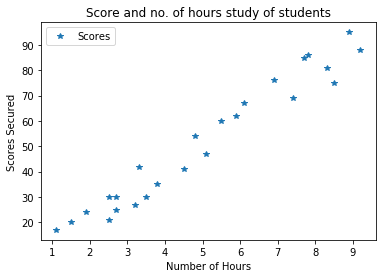

In [4]:
df.plot(x = 'Hours' , y = 'Scores', style = '*')
plt.xlabel("Number of Hours") # x-label
plt.ylabel("Scores Secured") # y- label
plt.title("Score and no. of hours study of students")

### From the above graph we can clearly see that there is positive linear relation i.e. if the student is studing for more hours then he/she might score high marks.

In [5]:
import seaborn as sns

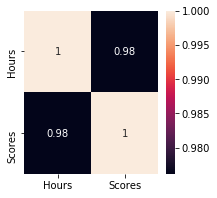

In [6]:
plt.figure(figsize = (3,3))
sns.heatmap(df.corr(), annot=True) # it shows that both are highly correlated

### Check the data for outliers

Text(0, 0.5, 'Hours')

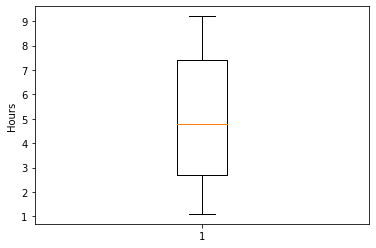

In [7]:
plt.boxplot(df['Hours'])
plt.ylabel("Hours")

Text(0, 0.5, 'Scores')

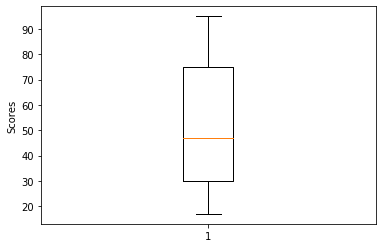

In [8]:
plt.boxplot(df['Scores'])
plt.ylabel("Scores")

### There are no out liers

## Check for Skewness

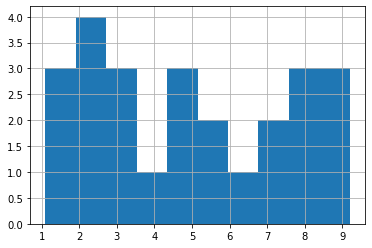

In [9]:
df['Hours'].hist()

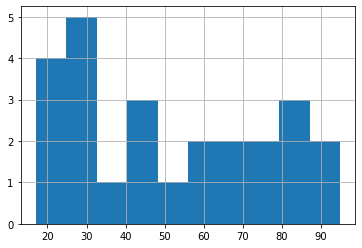

In [10]:
df['Scores'].hist()

### Although we see the skewness but the data we have is very less so its not advisable to remove the skewness

## Sampling the data

In [11]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

# Training and building the model on train data and testing on test data

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
linear = LinearRegression()


In [16]:
linear.fit(x_train,y_train)
print("Model Fitted")

Model Fitted


In [17]:
# plotting the regression line
line = linear.coef_*x+linear.intercept_

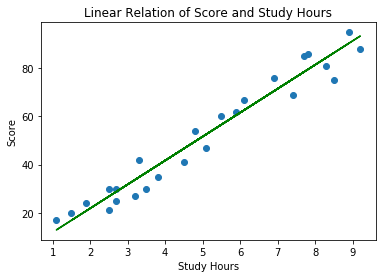

In [18]:
# Plotting for the test data
plt.scatter(x, y)
plt.title("Linear Relation of Score and Study Hours")
plt.plot(x, line,color = 'g');
plt.xlabel("Study Hours")
plt.ylabel("Score")
plt.show()

In [19]:
# prediction 
pred_values = linear.predict(x_test)
print("Prediction Done !!!")

Prediction Done !!!


In [20]:
# compare the Actual values with Predicted values
com = pd.DataFrame({"Acutal":(y_test),"Predicted":(pred_values)})
com

,Acutal,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Lets do the prediction on our own data

In [21]:
hour = np.array([5.1])

hour = hour.reshape(-1 , 1)

pred_own_data = linear.predict(hour)

print("No of Hours = {}".format(hour))

print("Predicted Score = {}".format(pred_own_data[0]))

No of Hours = [[5.1]]
Predicted Score = 52.63476378454093


In [22]:
x_train.shape

(18, 1)

### Adusted R-Square:

In [23]:
k = 1
N = 18
Rsq= linear.score(x_train, y_train)
AdR_Square= 1- (1-Rsq)*(N-1) / (N-k-1)

print("R Square value is ....",Rsq)
print("Adjusted R Square value is ....",AdR_Square)

R Square value is .... 0.9484509249326872
Adjusted R Square value is .... 0.9452291077409802


## Calculate MAE & MSE

In [24]:
from sklearn import metrics

In [25]:
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, pred_values))

print('Mean Squared Error:',  metrics.mean_squared_error(y_test, pred_values)) 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test , pred_values))) 

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


In [26]:
import pickle
pickle.dump(linear,open('markspred.pkl','wb'))

In [30]:
# load the model
linear = pickle.load(open('markspred.pkl','rb'))